In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Here, we import all necessary libraries for data manipulation (Pandas and Numpy), visualization (Seaborn and Matplotlib), and machine learning (Scikit-learn).

In [2]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("advertising.csv")
data.head()

Saving advertising.csv to advertising.csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



The dataset, advertising.csv, is uploaded from your local environment into Google Colab, and we display the first few rows of the data using data.head()

In [3]:
data.info()
print(data.isnull().sum())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Next, we examine the structure of the dataset using data.info(), which shows the data types of each feature and the number of non-null entries. We also check for any missing values in the dataset using isnull().sum(). The describe() function provides summary statistics for the numerical features, helping us understand the central tendency, spread, and potential outliers in the data

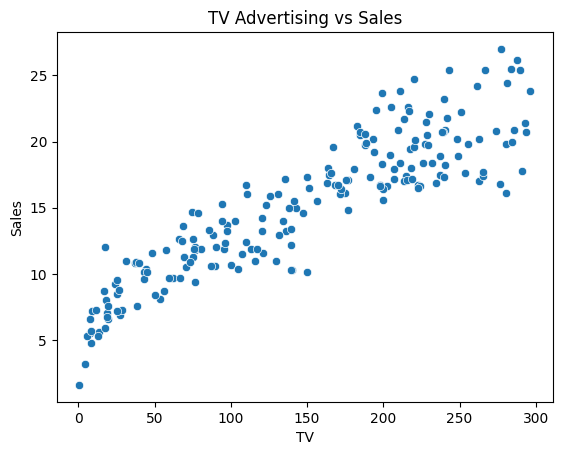

In [4]:
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising vs Sales')
plt.show()

A scatter plot is used here to visually explore the relationship between TV advertising expenditure and sales. This helps us see if there's any apparent linear trend between the two variables. If a positive or negative relationship is observed, it could suggest that TV advertising has an impact on sales.

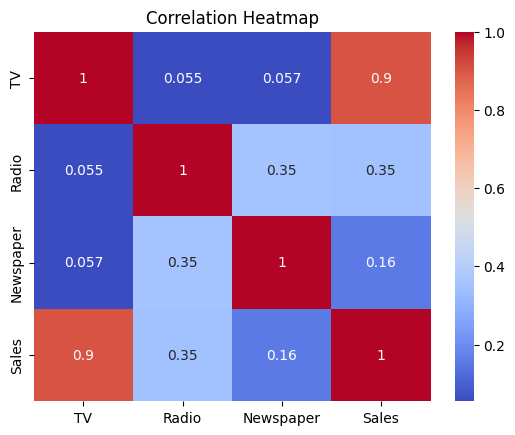

In [5]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

This heatmap visualizes the correlation matrix of the dataset, which shows how each feature is related to the others. The correlation values range from -1 to 1, where values closer to 1 indicate a strong positive correlation, and values closer to -1 indicate a strong negative correlation. The heatmap helps us identify features that are highly correlated with each other, which can inform model building decisions.


In [6]:
X = data[['TV']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We select the feature (TV) and the target variable (Sales) for the analysis. The dataset is then split into training and testing sets using train_test_split(). 80% of the data is used for training, and 20% is used for testing. This split helps us evaluate the model's performance on unseen data.

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient: 0.0554829439314632
Intercept: 7.007108428241848


A linear regression model is created using the LinearRegression() function from Scikit-learn. The model is then trained on the training data (X_train, y_train). The coefficient and intercept of the model are displayed, which represent the slope of the regression line and the y-intercept, respectively.

In [8]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

     Actual  Predicted
95     16.9  16.067473
15     22.4  17.848476
30     21.4  23.258063
158     7.3   7.656259
128    24.7  19.230001


After the model is trained, predictions are made on the test data (X_test) using the .predict() method. We then create a DataFrame to compare the actual sales (y_test) with the predicted sales (y_pred) and print the first few rows for comparison.

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.101072906773963
R-squared: 0.802561303423698


To evaluate the performance of our linear regression model, we calculate the Mean Squared Error (MSE) and R-squared value. MSE represents the average squared difference between the actual and predicted values, with lower values indicating better performance. R-squared measures how well the model explains the variance in the target variable, with values closer to 1 indicating a better fit.

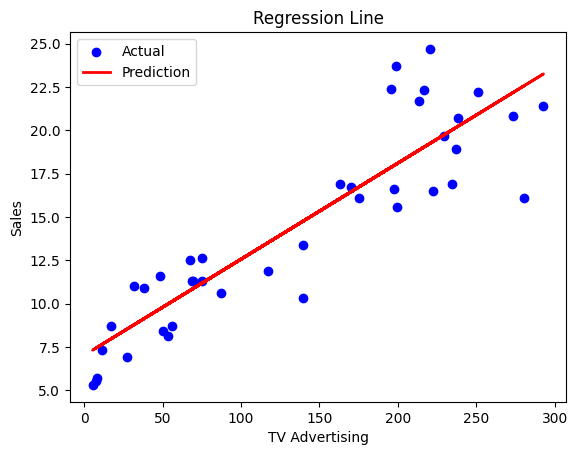

In [10]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Regression Line')
plt.legend()
plt.show()

This scatter plot visualizes the actual test data (X_test, y_test) in blue and the regression line (predicted values) in red. This helps us visually assess how well the model fits the data. The closer the red line is to the blue points, the better the model's predictions.

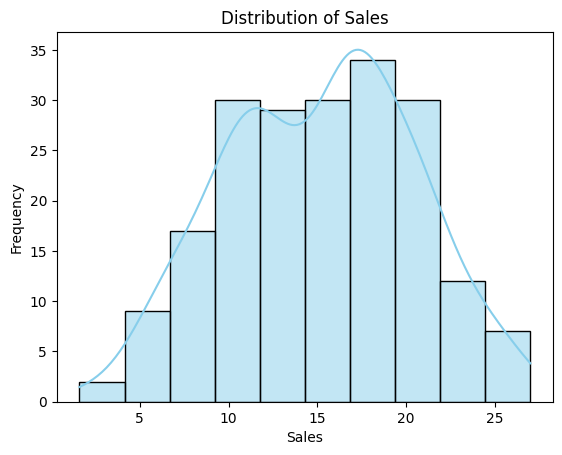

In [11]:
sns.histplot(data['Sales'], kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

A histogram with a Kernel Density Estimate (KDE) is used to visualize the distribution of the Sales variable. This gives us an idea of how the sales are distributed (e.g., skewed, normal, etc.). A more normally distributed sales data could imply that the model will perform better.

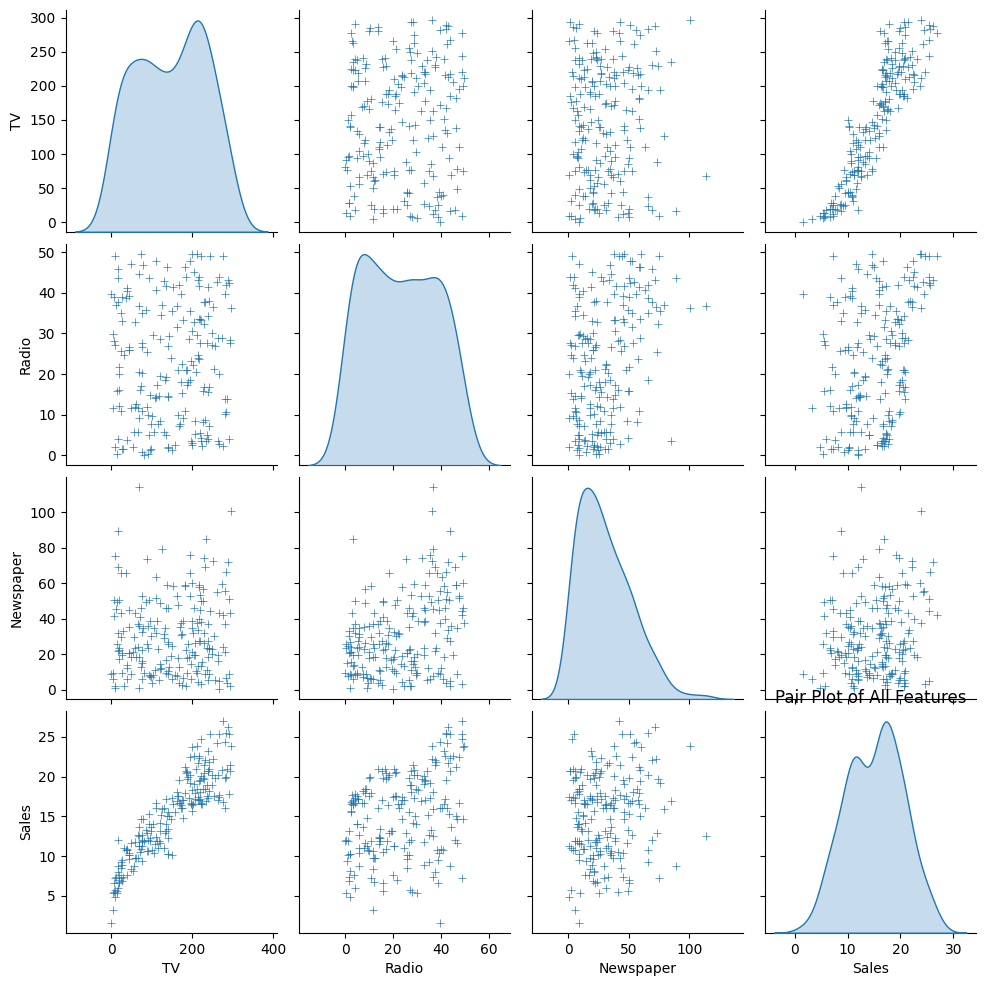

In [12]:
sns.pairplot(data, diag_kind='kde', markers='+')
plt.title('Pair Plot of All Features')
plt.show()

The pair plot shows scatter plots between all pairs of numerical features in the dataset. It also includes the KDE (Kernel Density Estimate) on the diagonal to display the distribution of each feature. This helps us understand the relationships between different features and identify any patterns that might be useful for the model.

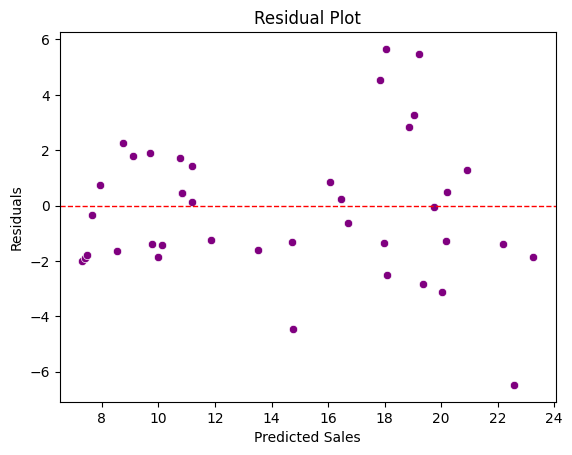

In [13]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()

The residual plot shows the difference between the predicted sales and the actual sales (residuals). A well-fitting model should have residuals evenly spread around zero. The red dashed line represents zero residuals, and any patterns in the residuals could indicate issues with the model, such as heteroscedasticity.

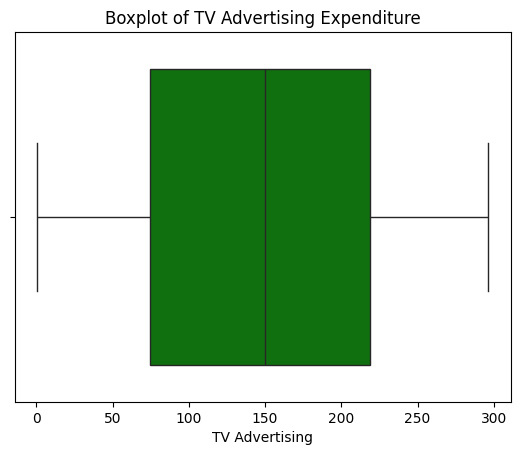

In [14]:
sns.boxplot(x=data['TV'], color='green')
plt.title('Boxplot of TV Advertising Expenditure')
plt.xlabel('TV Advertising')
plt.show()

The boxplot displays the distribution of TV advertising expenditures in the dataset. It highlights the median, quartiles, and potential outliers. This is useful for understanding the range of TV ad spends and identifying any extreme values that may need attention.

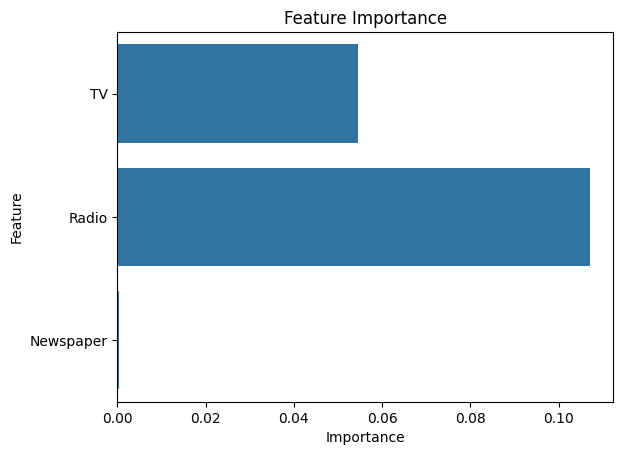

In [15]:
X_all = data[['TV', 'Radio', 'Newspaper']]
y_all = data['Sales']
model_all = LinearRegression()
model_all.fit(X_all, y_all)
feature_importance = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Importance': model_all.coef_
})
sns.barplot(x='Importance', y='Feature', data=feature_importance, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In this section, we use a multiple linear regression model to analyze the importance of each feature (TV, Radio, and Newspaper) in predicting sales. The bar plot shows the coefficient (importance) of each feature. A higher value indicates that the feature has more influence on the target variable (Sales).

In [16]:
from ipywidgets import interact
def scatter_plot(feature):
    sns.scatterplot(x=feature, y='Sales', data=data, color='orange')
    plt.title(f'{feature} vs Sales')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()
interact(scatter_plot, feature=['TV', 'Radio', 'Newspaper'])

interactive(children=(Dropdown(description='feature', options=('TV', 'Radio', 'Newspaper'), value='TV'), Outpu…

<function __main__.scatter_plot(feature)>

Using the ipywidgets library, we create an interactive scatter plot where users can select different features (TV, Radio, or Newspaper) to visualize their relationship with sales. This allows for dynamic exploration of the data.

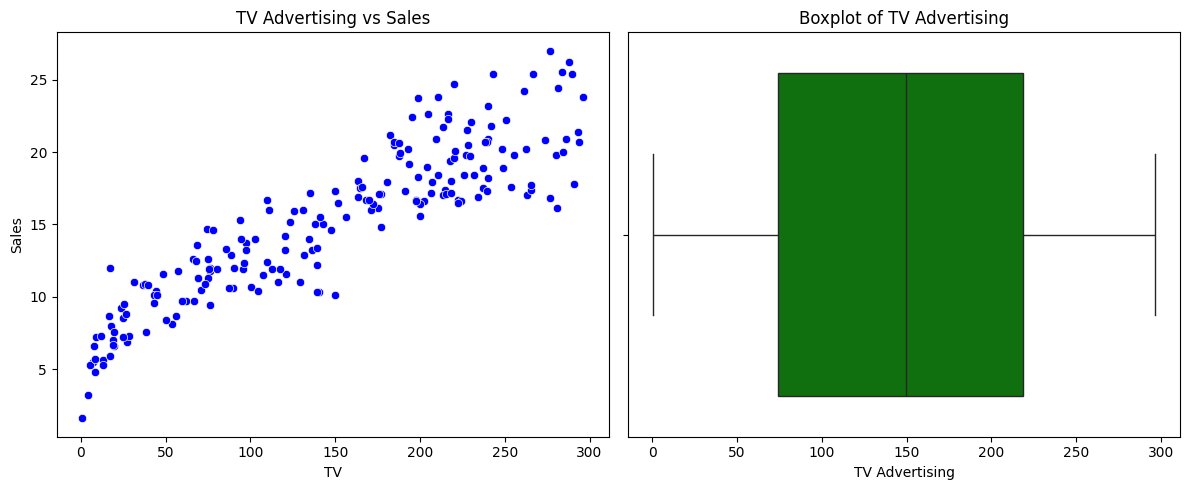

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='TV', y='Sales', data=data, ax=axes[0], color='blue')
axes[0].set_title('TV Advertising vs Sales')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')

sns.boxplot(x=data['TV'], ax=axes[1], color='green')
axes[1].set_title('Boxplot of TV Advertising')
axes[1].set_xlabel('TV Advertising')
plt.tight_layout()
plt.show()

Here, we combine two visualizations into a single plot. On the left, a scatter plot shows the relationship between TV advertising and sales, and on the right, a boxplot visualizes the distribution of TV advertising expenditure. This combined visual provides both a distribution and a correlation perspective in one view.